# A Model of the Reduction of HIV Concentration During Acute Infection

Kristtiya Vachiraseneekul Guerra

In [76]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'


# import functions from the modsim.py module
from modsim import *

In [77]:
def update_func(state, t, system):
    """Update the HIV model.
    
    state: State(r, l, v, e)
    t: time
    system: System object
    
    returns: State (rlve)
    """
    
    unpack(system)
    r, l, v, e = state
  

    dl = (system.rho * system.beta * r * v) - (system.mu * l) - (system.alpha * l)
    dr = (system.gamma * system.tau) - (system.mu * r) - (system.beta * r * v)
    de = (1 - system.rho) * system.beta * r * v + (system.alpha * l) - (system.delta * e)
    dv = system.pi * e - system.sigma * v
    
    
    r += dr * dt
    l += dl * dt
    v += dv * dt
    e += de * dt
   
    return State(R=r, L=l, V=v, E=e)

In [78]:


def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[t_0] = init

    linsteps = linspace(t_0, t_end, int(t_end/dt))
    time_steps = Series(steps)
    
    for t in time_steps.index[:-1]:
        frame.row[time_steps[t+1]] = update_func(frame.row[time_steps[t]], dt,system)
    
    
    return frame

In [79]:
init = State(R=1000, L=0, V=1, E=0)

,values
R,1000
L,0
V,1
E,0


In [84]:
system = System(t_0 = 0,
                t_end = 120,
                gamma = 1.36,
                tau = 0.2,
                mu = 0.00136,
                beta = 0.00027,
                rho = 0.1,
                alpha = 0.036,
                delta = 0.33,
                pi = 100,
                sigma = 2,
                dt = 0.1,
                steps=200)

update_func(init, 0, system)

,values
R,999.8642
L,0.0027
V,0.8000
E,0.0243


In [85]:
results = run_simulation(system, update_func)
results.head()

,R,L,V,E
0.0,1000,0,1,0


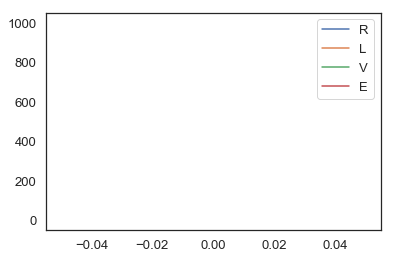

In [86]:
results.plot()

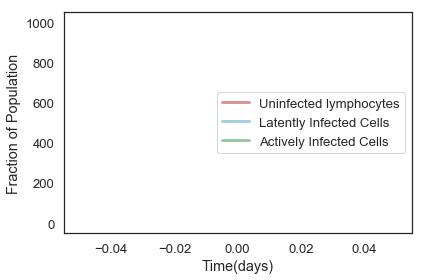

In [87]:
plot(results.R, '-r', label='Uninfected lymphocytes')
plot(results.L, '-c', label='Latently Infected Cells')
plot(results.E, '-g', label='Actively Infected Cells')

decorate(xlabel='Time(days)', ylabel='Fraction of Population')